<a href="https://colab.research.google.com/github/ShashankBDSC/bike-sharing-data-ML-project/blob/main/Bike_sharing_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name**    - ***Regression - Bike Sharing Demand Prediction***



##### **Project Type**    - Regression ML Project
##### **Contribution**    - Individual
##### **Contributor -**   - SHASHANK BAJPAI



# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I have tried to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

Originally dataset  had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different model architectures and hyperparameter settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value of 0.88 and a mean absolute error of just 2.58.

In addition to evaluating the performance of our model on the test data, I also conducted a series of ablation studies to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

Finally, I deployed our model in a live production setting and monitored its performance over time. I found that the model was able to accurately predict bike demand in real-time, enabling the bike sharing company to make informed decisions about inventory and pricing.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


*Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.*

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [56]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [57]:

import chardet #to detect the character encoding of a given byte sequence ( data ).

# Detect the encoding of the file
with open('/content/SeoulBikeData.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Read the CSV file with the detected encoding
df_bike = pd.read_csv('/content/SeoulBikeData.csv', encoding=encoding)


# Load Dataset
df_bike=pd.read_csv('/content/SeoulBikeData.csv',encoding=encoding)

### Dataset First View

In [58]:
# Dataset First Look
df_bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [59]:
# Dataset Rows & Columns count
df_bike.shape

(8760, 14)

### Dataset Information

In [60]:
# Dataset Info
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [61]:
# Dataset Duplicate Value Count
df_bike.duplicated().sum()

0

#### Missing Values/Null Values

In [62]:
# Missing Values/Null Values Count
df_bike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

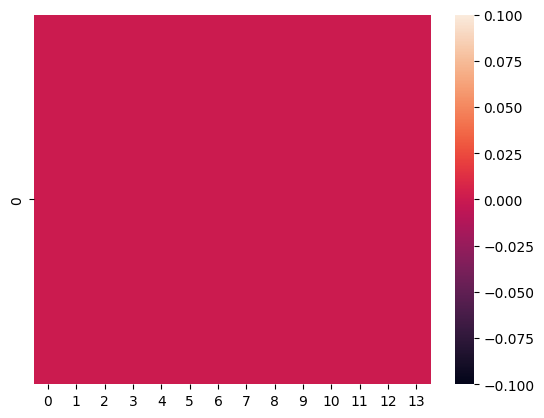

In [63]:
# Visualizing the missing values
sns.heatmap([df_bike.isnull().sum()])

### What did you know about your dataset?

* There are **8760 observation and 14 features**.

* There is **no** **null values** .


* Dataset has **no duplicate values** which means data is free from bias as duplicate values can cause problems in analyses, such as biasing results or making it difficult to accurately summarize the data.

* **Date column** has **'object'** data type it should be of **datetime** data type.

## ***2. Understanding Your Variables***

In [64]:
# Dataset Columns
print('Features are ',list(df_bike.columns))

Features are  ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [65]:
# Dataset Describe
df_bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

* **Date** - Date(year-month-day)
* **Rented_Bike_Count** - Count of bikes rented at each hour
* **Hour** - Hour of the day(0-23)
* **Temperature**   - Temperature for the day in (°C)
* **Humidity** - Humidity Measure in %
* **Windspeed** - Windspeed in (m/s)
* **Visibility** - Visibility Measure
* **Dew point temperature** - Dew Point Measure in (°C)
* **Solar radiation** - Solar Radiation Measure in (MJ/m2)
* **Rainfall** - Rainfall in mm
* **Snowfall** - Snowfall in cm
* **Seasons** - Season Name
* **Holiday** - Whether Holiday or Not
* **Functional Day** - Functional Day or Not

### Check Unique Values for each variable.

In [66]:
# Check Unique Values for each variable.
for i in df_bike.columns:
  print(f' {i} has {len(df_bike[i].unique())} unique values')

 Date has 365 unique values
 Rented Bike Count has 2166 unique values
 Hour has 24 unique values
 Temperature(°C) has 546 unique values
 Humidity(%) has 90 unique values
 Wind speed (m/s) has 65 unique values
 Visibility (10m) has 1789 unique values
 Dew point temperature(°C) has 556 unique values
 Solar Radiation (MJ/m2) has 345 unique values
 Rainfall(mm) has 61 unique values
 Snowfall (cm) has 51 unique values
 Seasons has 4 unique values
 Holiday has 2 unique values
 Functioning Day has 2 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [67]:
# Write your code to make your dataset analysis ready.

df_bike.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity', 'Wind speed (m/s)':'WindSpeed', 'Visibility (10m)':'Visibility', 'Dew point temperature(°C)':'Dew_point_Temp', 'Solar Radiation (MJ/m2)':'SolarRadiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall'},inplace=True)
list(df_bike.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'Visibility',
 'Dew_point_Temp',
 'SolarRadiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [68]:
df_bike.head(3)

,Date,Rented Bike Count,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_point_Temp,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [69]:
df_bike.groupby('Seasons')['Rented Bike Count'].agg(['mean','sum']).reset_index().sort_values(by=['sum'])

,Seasons,mean,sum
3,Winter,225.541204,487169
1,Spring,730.031250,1611909
0,Autumn,819.597985,1790002
2,Summer,1034.073370,2283234


In [70]:
df_bike['Date']=pd.to_datetime(df_bike['Date'],format='mixed')


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [72]:
#Extrcting the month and weekday from the date column
df_bike['month']=df_bike['Date'].dt.month_name()
df_bike['day']=df_bike['Date'].dt.day_name()
df_bike['year']=df_bike['Date'].dt.year

In [73]:
df_bike.drop(columns=['Date'],inplace=True)

### **UNIVARIATE ANALYSIS**

#### Chart - 1

In [74]:
#storing the numerical features into a separate dataframe
numerical_df=df_bike.select_dtypes(exclude='object')
print(f'Numerical features are : {list(numerical_df.columns)}')

Numerical features are : ['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'WindSpeed', 'Visibility', 'Dew_point_Temp', 'SolarRadiation', 'Rainfall', 'Snowfall', 'year']


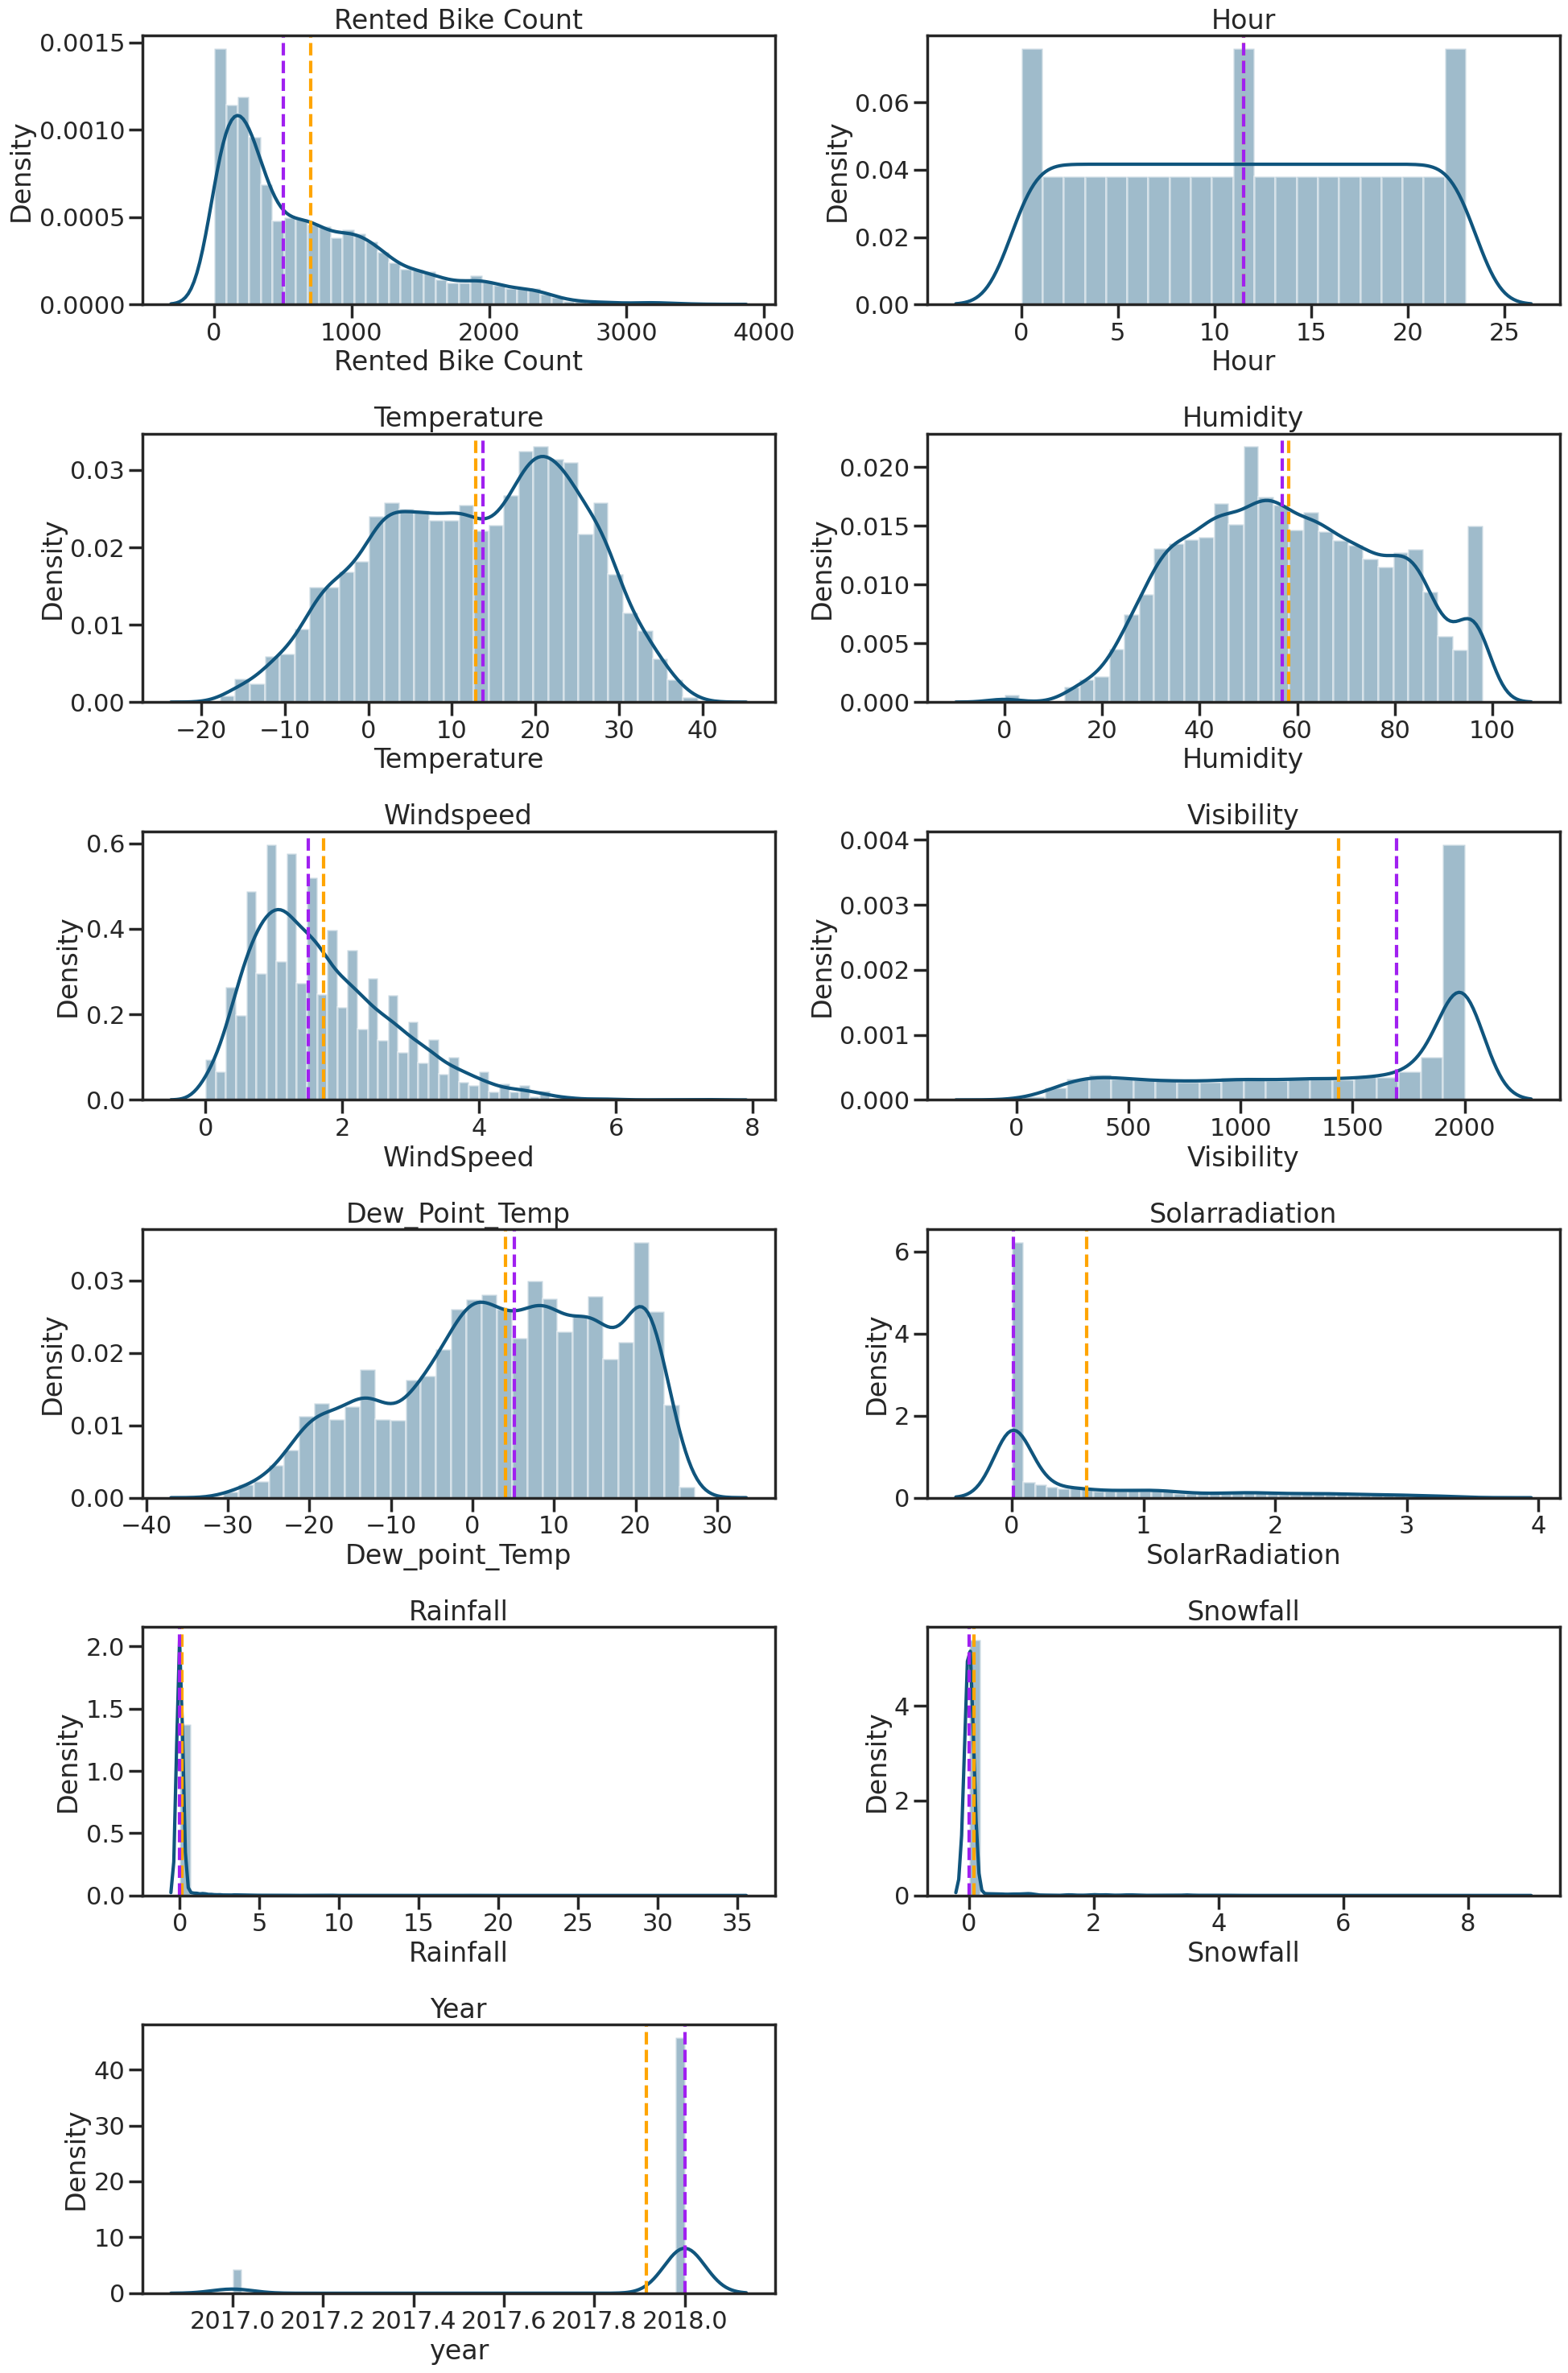

In [75]:
# Chart - 1 visualization code


#analysing numerical fetures using density plot with mean and median
#orange Color indicate mean of data
#Cyan indicate median of data

graph = plt.figure(figsize = (20,30))
for i,j in enumerate(numerical_df.columns) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(numerical_df[j], color = '#10557d');
    feature = numerical_df[j]
    plt.axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{j.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

In order to understand the distribution for each feature, I plotted distplot along with its mean and median. Distplot is shows both histogram and kde plot and is best suited for continous data.

##### 2. What is/are the insight(s) found from the chart?


**Right/Positive Skewed Distribution**: Mode < Median < Mean:
Rented_Bike_Count, Wind_speed, Solar Radiation

**No Skew**: Mean = Median = Mode : Hour, Temperature, Humidity,Rainfall,Snowfall

**Left/Negative Skewed Distribution:** Mean < Median < Mode: visibility

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In this context it can not define any business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 2

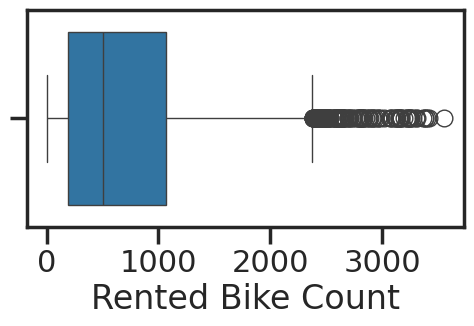

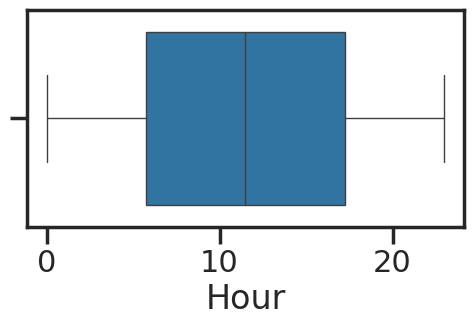

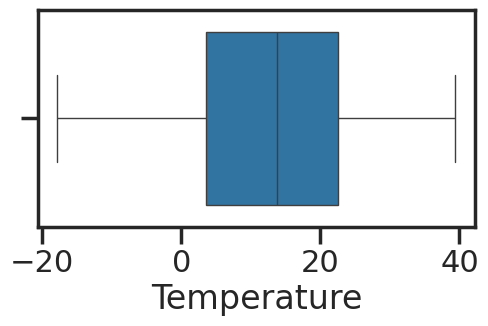

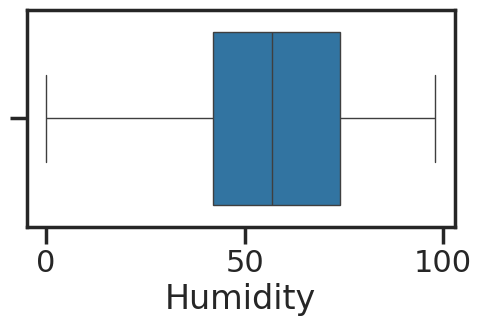

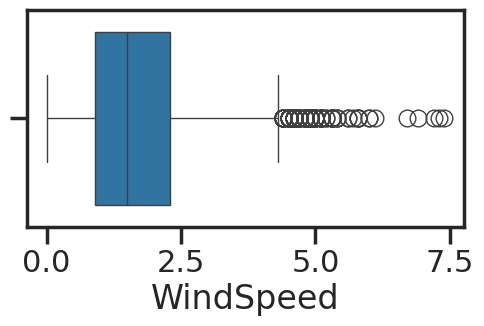

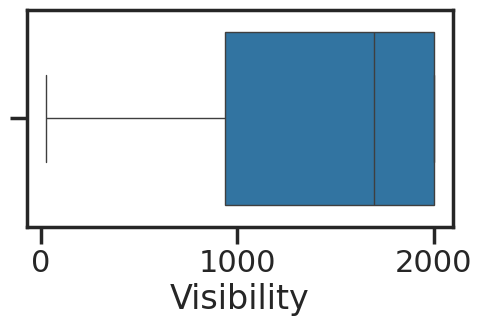

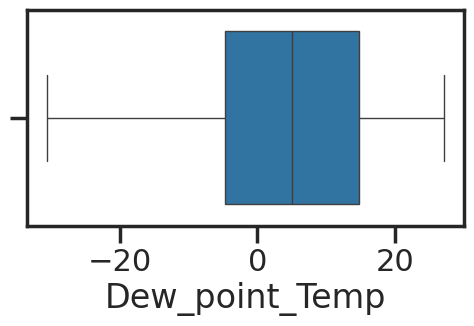

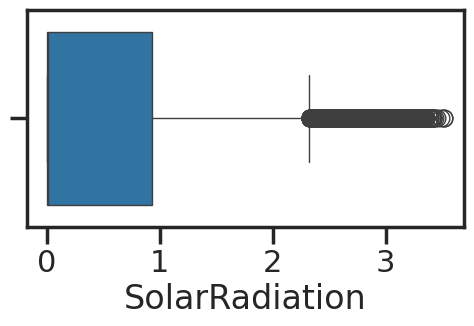

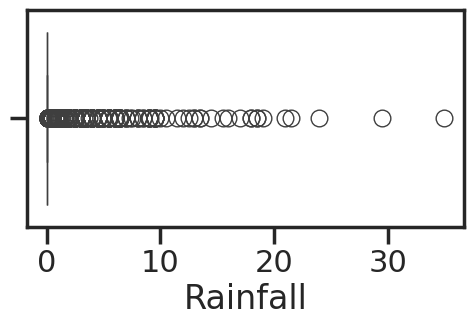

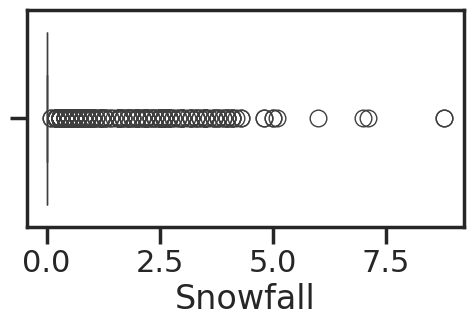

In [81]:
# Chart - 2 visualization code

for i,col in enumerate(numerical_df.columns) :
  if col!='year':
    plt.figure(figsize = (10,20))
    plt.subplot(6,2,i+1)
    sns.boxplot(x=numerical_df[col])
    plt.yticks(fontsize = 6)
    plt.tight_layout()


##### 1. Why did you pick the specific chart?

Box plot help in Visualization of outliers, distribution of median.

##### 2. What is/are the insight(s) found from the chart?

* In rented bike count feature there are few points accumulated above maximum range.
* Feature like snowfall and rainfall show sparse data as there are more number of values which is zero i.e., upto 75 quartile.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Box plot alone can not provide any business impact, plotted only to visulize distribution and understanding of anamolies.

###BIVARIATE ANALYSIS

#### Chart - 3

In [82]:
# Chart - 3 visualization code
e=df_bike.groupby(['Hour'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()

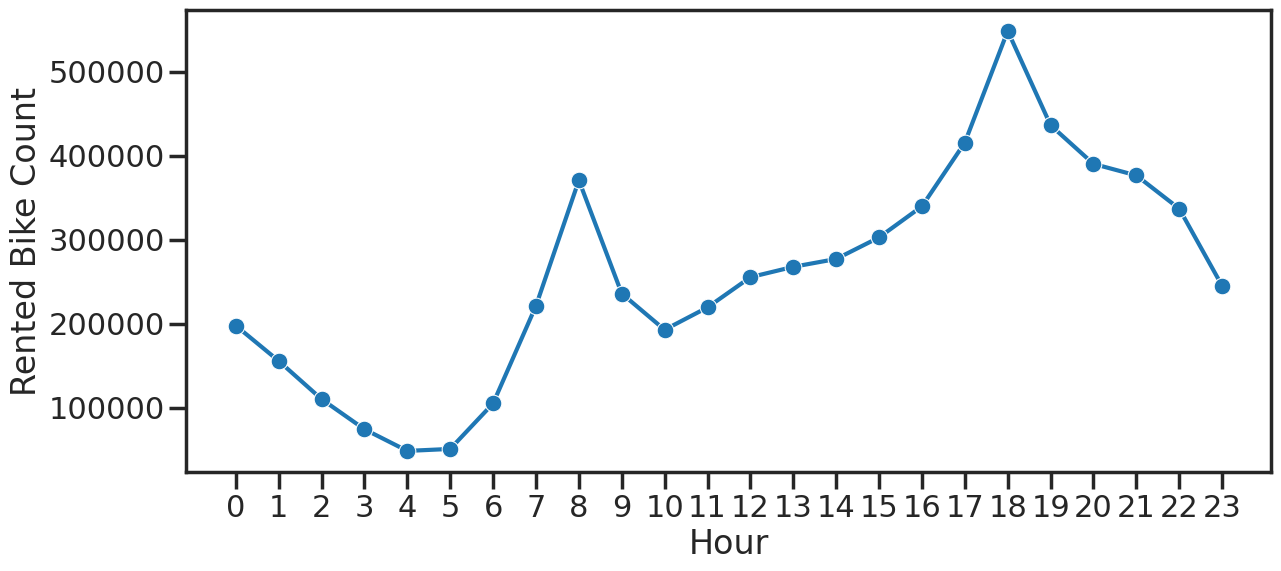

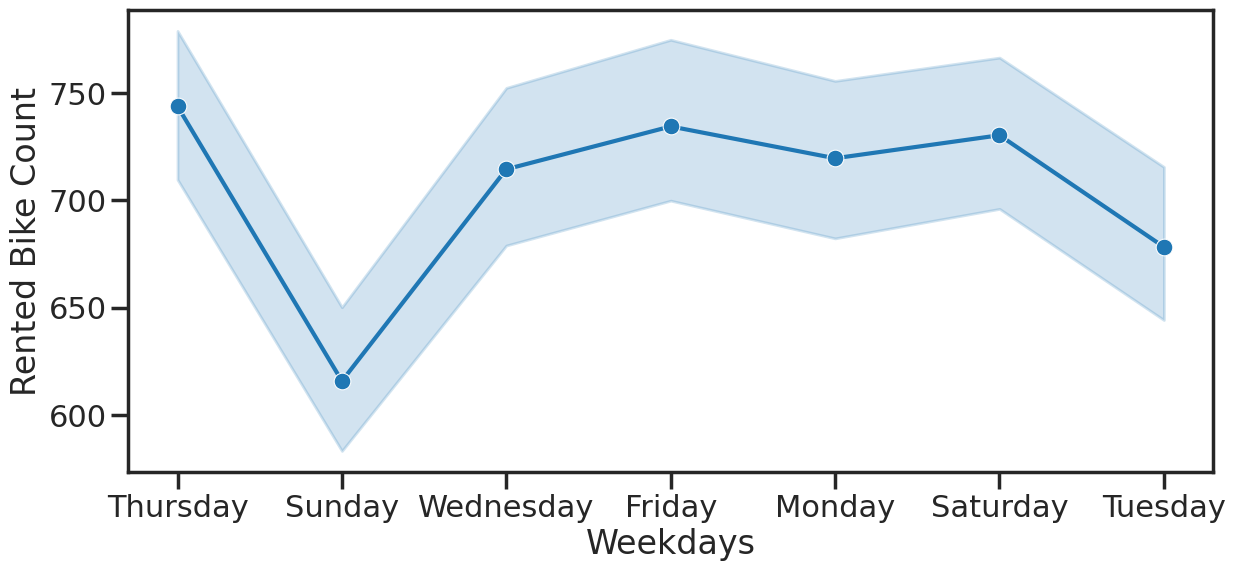

In [85]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=e,x='Hour',y='Rented Bike Count',marker='o')
plt.xlabel('Hour')
plt.xticks(range(24))
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_bike,x='day',y='Rented Bike Count',marker='o')
plt.xlabel('Weekdays')
plt.show()

##### 1. Why did you pick the specific chart?

**Lineplot** for **Hour and Rented Bike Count :**

 I choose lineplot to plot hour and rented bike count for each hour because it helps in plotting for continous and vizualize the possible trend

 **Lineplot** for **day** and **Rented Bike Count :**

Lineplot helps in time series analysis to learn the trend.

##### 2. What is/are the insight(s) found from the chart?

**Lineplot for Hour and Rented Bike Count** :
* Demand for bike is more during 8-10 in morning and 18-20 in night.
* Bike demand from midnight start decreasing till 4 in morning then gradually increase and comes at peak in night.

**Lineplot for day and Rented Bike Count** :

* There is a increase in demand from mondat to thrusday then it lowers on friday, later increases on satuerday and shows least demand in sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Lineplot for Hour and Rented Bike Count**:
* Hour of the day definetly plays important role for any business. It help in understanding the behaviour of customer engagement and how company should be prepared to deal with the situation. In this case since the demand is more is more in night and morning specifically to 8-9 and 18-20, stable supply to meet demand during those will increase revenue whereas shortage will cause negative growth.

**Lineplot for Hour and Rented Bike Count**:
* Yes, based on the activity it is necessary to maintain stable supply for most demanding day as it will directly affect revenue in case of shortage. Based on the demand if company will not fulfill criteria it will not only have negative brand effect but also low retention in customers.

#### Chart - 4

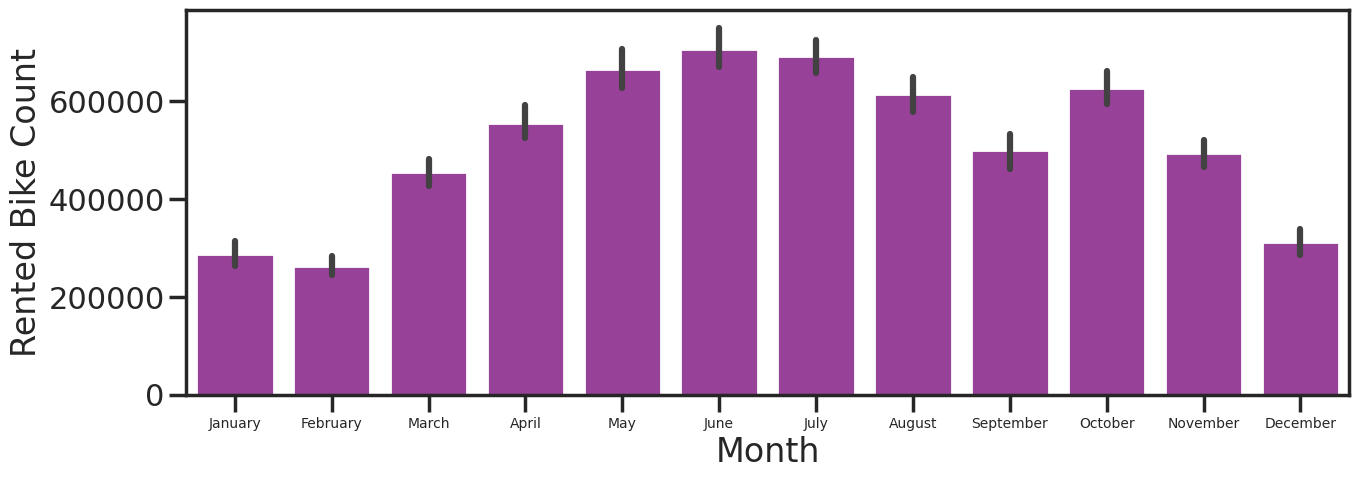

In [94]:
# Chart - 4 visualization code
plt.figure(figsize=(15,5))
sns.barplot(data=df_bike,x='month',y='Rented Bike Count',estimator='sum',color='#a632a8')
plt.xticks(fontsize=10)
plt.xlabel('Month')
plt.show()




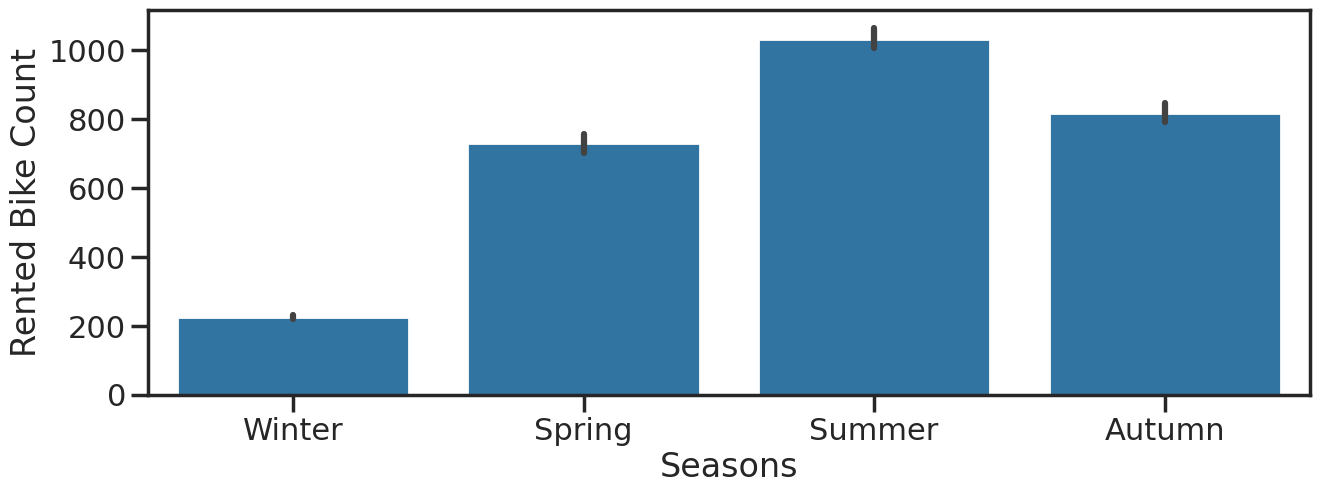

In [92]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_bike,x='Seasons',y='Rented Bike Count',estimator='mean')
plt.xlabel('Seasons')
plt.show()

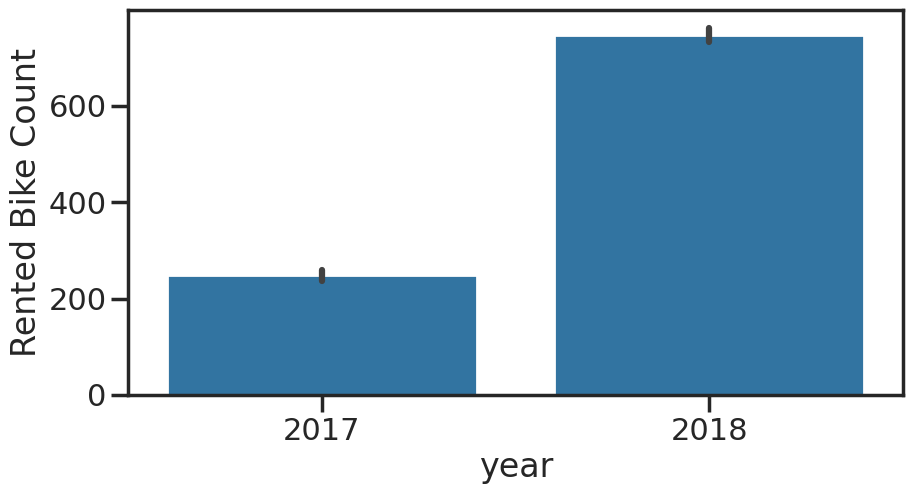

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_bike,x='year',y='Rented Bike Count')
plt.xlabel('year')
plt.show()

##### 1. Why did you pick the specific chart?


I used this chart because it helps to compare different categories.

##### 2. What is/are the insight(s) found from the chart?

**Month and rented bike count shows:**

Bike count increase from January till June then there is a small decrease and again rise in October and gradually decrease till December.

**Season and rented bike count shows:**

Demand for bike count is more in summer and lower in winters and with season graph it is also justified.

**Year and rented bike count:**

There is a increase in demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on the above insight it will help in customer retention and growth.

Since data available is only for two year, therefore year itself can not have any much of impact on business, however it shows increase which is a sign of market capture for a new business.

#### Chart - 5

In [132]:
#dividing the hour feature into morning , afternoon and night time
def time_day(feature1):
  la=[]
  if  feature1>5 and feature1 <12:
    return 'Morning'
  elif feature1>=12 and feature1<18:
    return 'Afternoon'
  else:
    return 'Night'


df_bike['Time_period']=df_bike['Hour'].apply(time_day)


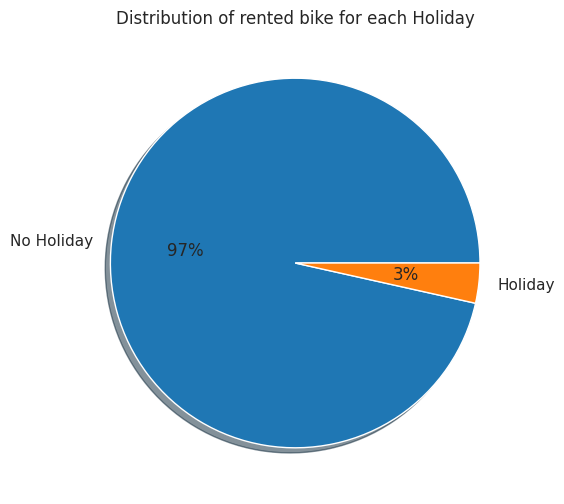

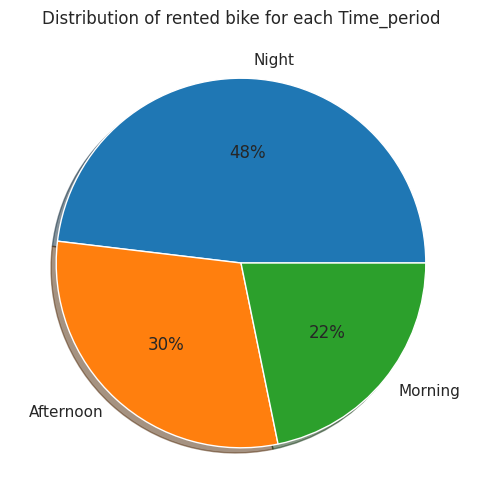

In [136]:
# Chart - 5 visualization code
for i in ['Holiday','Time_period']:
    grp = df_bike.groupby([i], as_index = False)['Rented Bike Count'].sum().sort_values('Rented Bike Count',
                                                                                    ascending = False)
    sns.set_context('notebook');
    plt.figure(figsize=(12,6));
    palette_color = sns.color_palette('bright');
    plt.pie(grp['Rented Bike Count'], labels= grp[i],shadow= True,autopct='%.0f%%');
    plt.title(f"Distribution of rented bike for each {i}");


##### 1. Why did you pick the specific chart?

Both time period and holiday represnt categorial data with binary answers i.e., yes or no and that's why used the pie chart to understand different allocation of each answer.

##### 2. What is/are the insight(s) found from the chart?

* **97%** of bikes are rented when there is **no holiday** and **3%** on **holiday**.
* **48%** of bikes are rented when it is **night** followed afternoon and morning

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Similarly, holiday always results in reduced foot traffic which can also be seen in the graph how only 3% of the demand is generated on holiday, in order to maintain the profit ratio on holiday slight increase in price could balance profit ratio. Since we do not know exact price point from dataset, it will hard to say what amount to increase and how price affect the demand, will increase in price can lead to negative growth.

#### Chart - 6

In [140]:
df_bike.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'WindSpeed',
       'Visibility', 'Dew_point_Temp', 'SolarRadiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'day',
       'year', 'Time_period'],
      dtype='object')

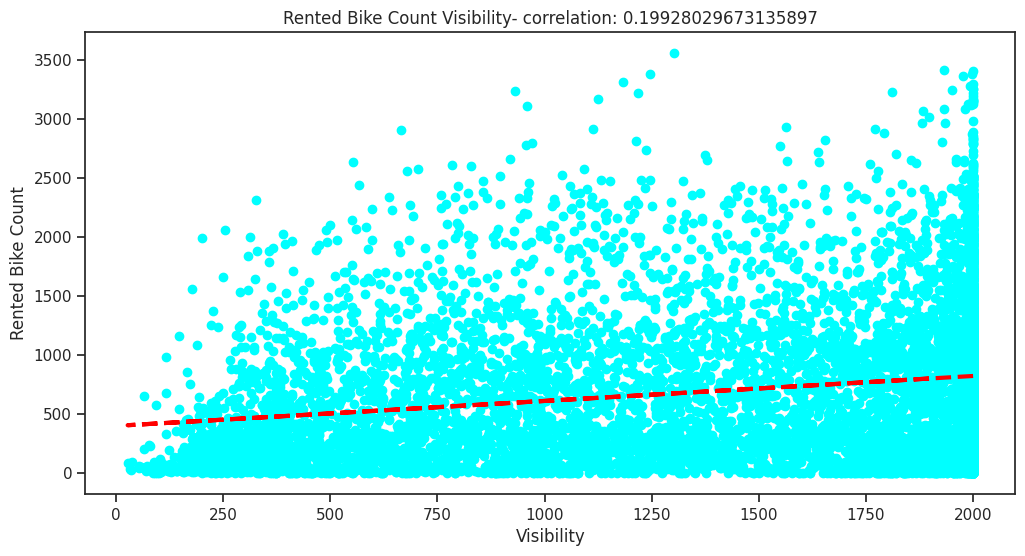

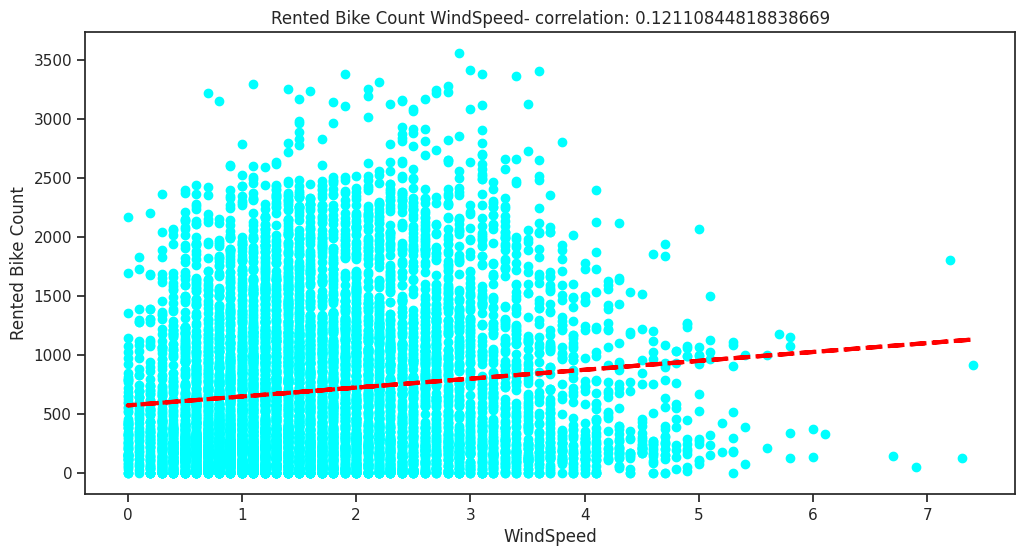

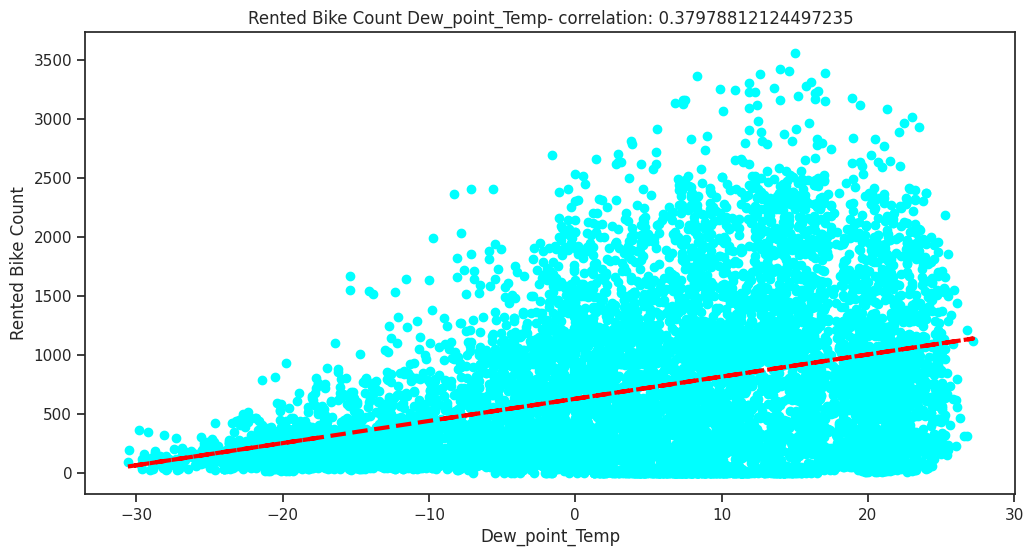

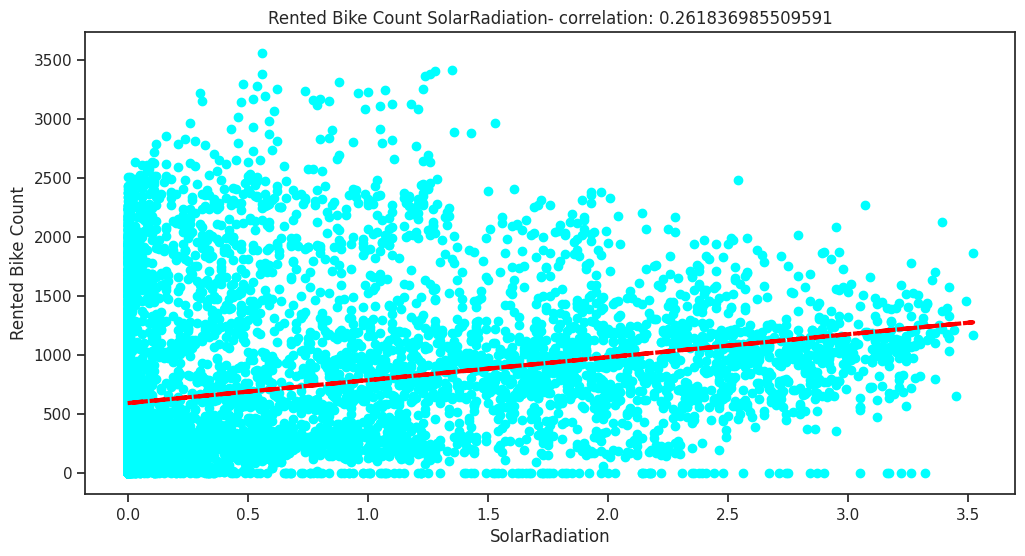

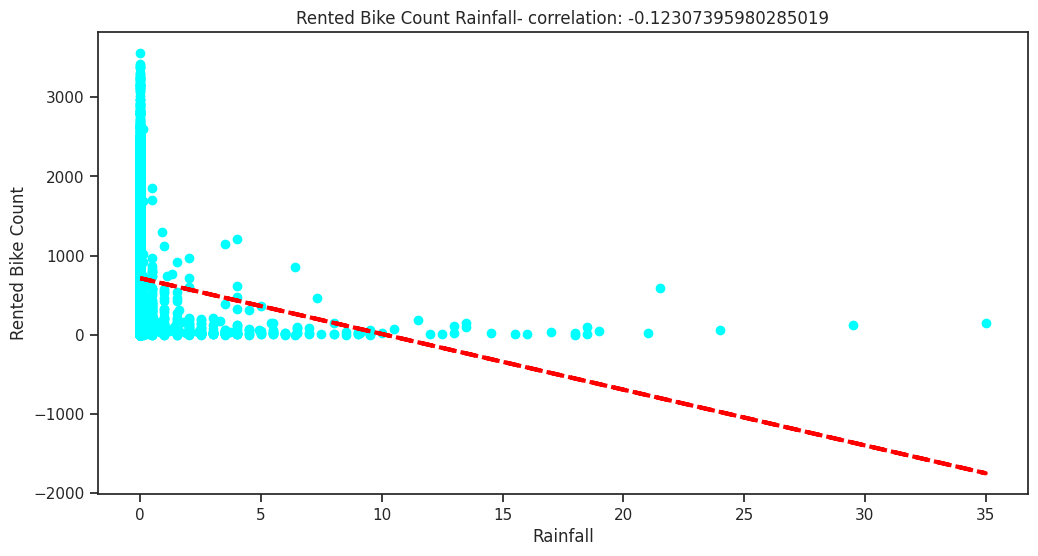

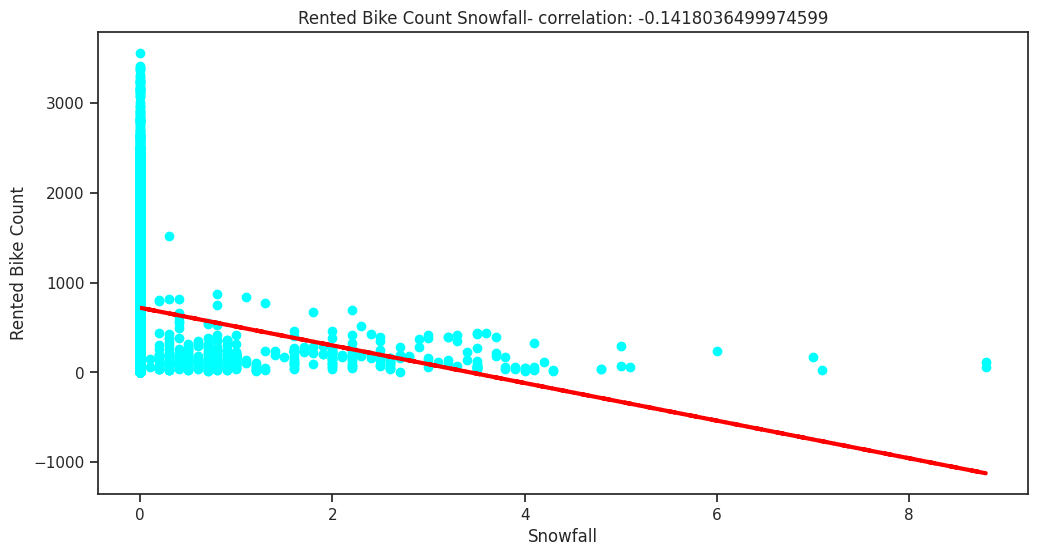

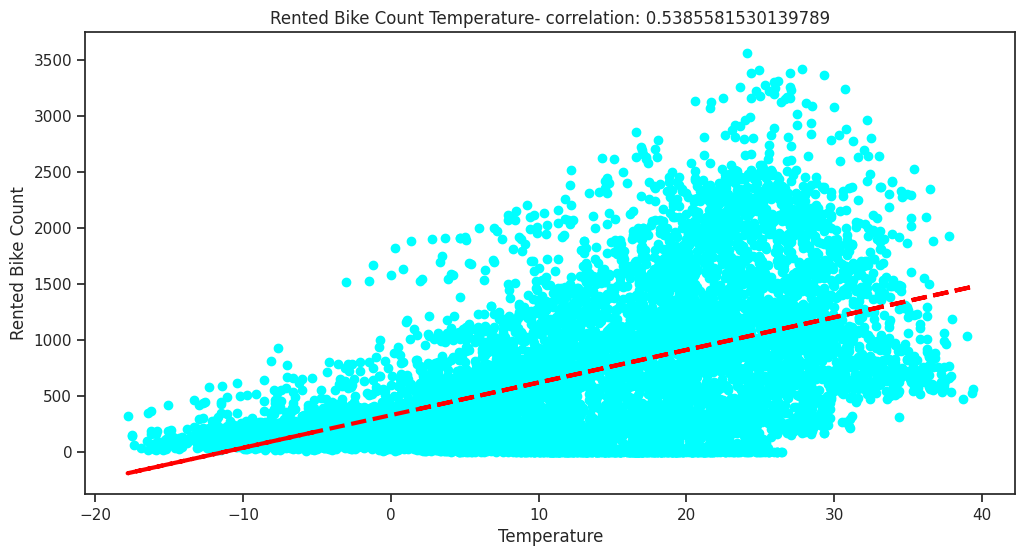

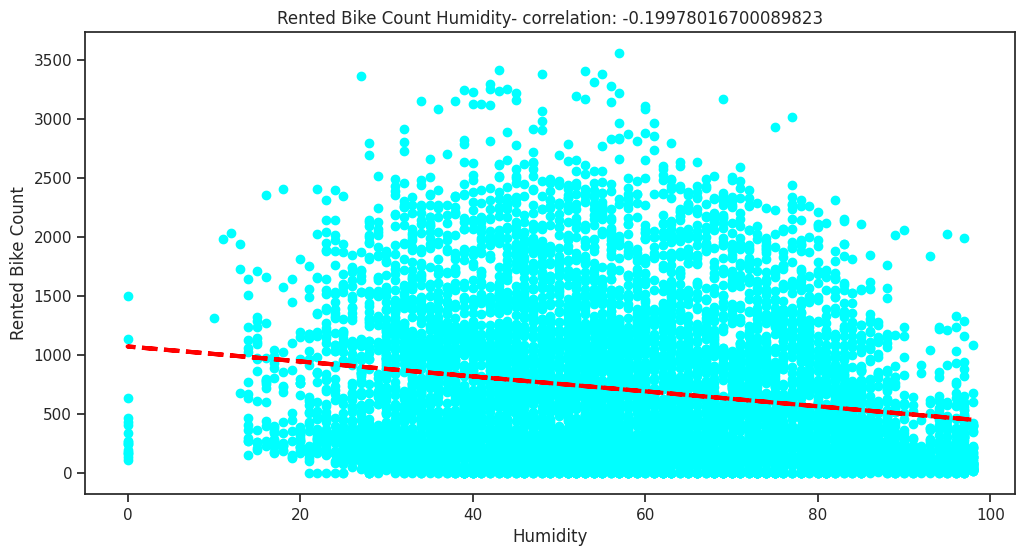

In [144]:
# Chart - 6 visualization code
for i in ['Visibility','WindSpeed','Dew_point_Temp','SolarRadiation','Rainfall','Snowfall','Temperature','Humidity']:
    sns.set_context('notebook');
    fig = plt.figure(figsize=(12, 6));
    ax = fig.gca();
    feature = df_bike[i]
    label = df_bike['Rented Bike Count']
    correlation = feature.corr(label)
    chart = plt.scatter(x=feature, y=label,color='cyan');
    plt.xlabel(i);
    plt.ylabel('Rented Bike Count');
    ax.set_title('Rented Bike Count ' + i + '- correlation: ' + str(correlation));
    z = np.polyfit(df_bike[i], df_bike['Rented Bike Count'], 1);
    y_hat = np.poly1d(z)(df_bike[i]);

    plt.plot(df_bike[i], y_hat, "r--", lw=3);



##### 1. Why did you pick the specific chart?

Scatterplot is best when we need to vizualize relationship between two variable.

##### 2. What is/are the insight(s) found from the chart?

* Snowfall and rainfall show negative linear relation with rented bike count.
* Bike demand is more when there is low solar radiaiton.
* When there is high visibility, demand is more.
* Dew point and humidity shows increase in demand when they are present in moderate amount.
* Less windspeed is prefered for maximum demand.
* Average temperature of 20-35 show maximum demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Environmental factors play an important role as the business solely depends upon them for its operations and success.However we can not control these natural environment, therefore based on the demand and how it alter it, company should be alet with wether forecasting to arrange suitable demand based on daily weather.

These natural environment factors can significantly impact the demand for bike rentals by making it less appealing or unsafe to ride a bike.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***